In [1]:
import os

import nengo
from nengo.builder.ensemble import get_activities
import nengolib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
import matplotlib.patches as mpatches
%matplotlib inline

from nengo_learn_assoc_mem.paths import plot_path

In [2]:
def get_alpha(acts: np.ndarray, max_act: float, color: str) -> np.ndarray:
    alpha = np.zeros((len(acts), 4))
    alpha[:, :3] = np.array(matplotlib.colors.to_rgb(color))
    alpha[:, 3] = acts / max_act
    return alpha

In [3]:
low_eval_points = nengolib.stats.ball.sample(2000, 2)
high_eval_points = nengolib.stats.ball.sample(2000, 2)

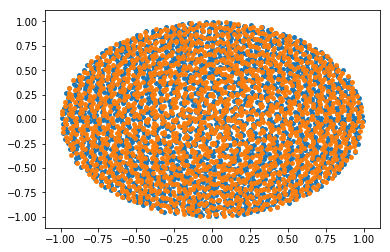

In [4]:
plt.scatter(low_eval_points[:, 0], low_eval_points[:, 1], s=15)
plt.scatter(high_eval_points[:, 0], high_eval_points[:, 1], s=15)

In [5]:
orig_vec = np.array([[1, 0]])

with nengo.Network() as model:
    low_ens = nengo.Ensemble(1, 2, encoders=orig_vec, max_rates=[300], intercepts=[np.cos(np.pi/3)])
    high_ens = nengo.Ensemble(1, 2, encoders=orig_vec, max_rates=[300], intercepts=[np.cos(np.pi/6)])

with nengo.Simulator(model) as sim:
    pass

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

In [6]:
low_acts = get_activities(sim.data[low_ens], low_ens, low_eval_points).squeeze()
high_acts = get_activities(sim.data[high_ens], high_ens, high_eval_points).squeeze()

In [7]:
low_alpha = get_alpha(low_acts, np.max(low_acts), "C0")
high_alpha = get_alpha(high_acts, np.max(high_acts), "C1")

In [8]:
simi_stim = np.pi/10

stim = np.array([[np.cos(simi_stim), np.sin(simi_stim)], [np.cos(simi_stim), -np.sin(simi_stim)]])

In [9]:
with nengo.Network() as model:
    low_ens = nengo.Ensemble(1, 2, encoders=[stim[0]], max_rates=[300], intercepts=[np.cos(np.pi/3)])
    high_ens = nengo.Ensemble(1, 2, encoders=[stim[0]], max_rates=[300], intercepts=[np.cos(np.pi/6)])

with nengo.Simulator(model) as sim:
    pass

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

In [10]:
post_low_acts = get_activities(sim.data[low_ens], low_ens, low_eval_points).squeeze()
post_high_acts = get_activities(sim.data[high_ens], high_ens, high_eval_points).squeeze()

In [11]:
post_low_alpha = get_alpha(post_low_acts, np.max(post_low_acts), "C0")
post_high_alpha = get_alpha(post_high_acts, np.max(post_high_acts), "C1")

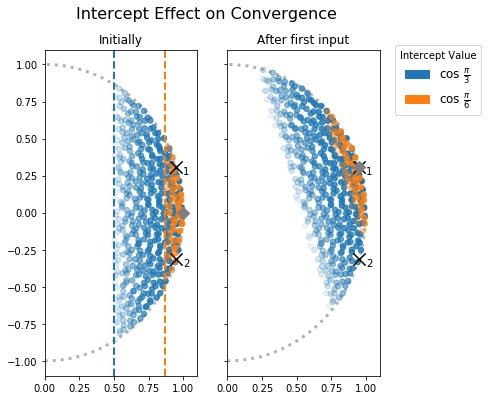

In [12]:
pt_size = 30
enc_size = 75
stim_size = 150
annot_off = .05
annot_size = 10

fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(6, 6))

ax1_unit_circ = plt.Circle((0, 0), 1, color="k", fill=False, linestyle=":", linewidth=3, alpha=0.3, zorder=0)
ax1.add_artist(ax1_unit_circ)
ax1.scatter(low_eval_points[:, 0], low_eval_points[:, 1], color=low_alpha, s=pt_size)
ax1.scatter(high_eval_points[:, 0], high_eval_points[:, 1], color=high_alpha, s=pt_size)

ax1.scatter(stim[:, 0], stim[:, 1], s=stim_size, color='k', marker="x")
ax1.text(stim[0, 0]+annot_off, stim[0, 1]-annot_off, "1", fontsize=annot_size)
ax1.text(stim[1, 0]+annot_off, stim[1, 1]-annot_off, "2", fontsize=annot_size)

ax1.scatter(orig_vec[:, 0], orig_vec[:, 1], color="C7", s=enc_size, marker="D")

ax1.axvline(np.cos(np.pi/3), color="C0", linestyle="--", linewidth=2)
ax1.axvline(np.cos(np.pi/6), color="C1", linestyle="--", linewidth=2)
ax1.set_ylim(-1.1, 1.1)
ax1.set_xlim(0, 1.1)
ax1.set_title("Initially")

ax2_unit_circ = plt.Circle((0, 0), 1, color="k", fill=False, linestyle=":", linewidth=3, alpha=0.3, zorder=0)
ax2.add_artist(ax2_unit_circ)
ax2.scatter(low_eval_points[:, 0], low_eval_points[:, 1], color=post_low_alpha, s=pt_size)
ax2.scatter(high_eval_points[:, 0], high_eval_points[:, 1], color=post_high_alpha, s=pt_size)
ax2.scatter(stim[:, 0], stim[:, 1], s=stim_size, color='k', marker="x")
ax2.text(stim[0, 0]+annot_off, stim[0, 1]-annot_off, "1", fontsize=annot_size)
ax2.text(stim[1, 0]+annot_off, stim[1, 1]-annot_off, "2", fontsize=annot_size)

ax2.scatter(stim[0, 0], stim[0, 1], color="C7", s=enc_size, marker="D")
ax2.set_title("After first input")

fig.suptitle("Intercept Effect on Convergence", fontsize=16)

leg_handles = [
    mpatches.Patch(color="C0", label=r"$\cos\ \frac{\pi}{3}$"),
    mpatches.Patch(color="C1", label=r"$\cos\ \frac{\pi}{6}$")]
ax2.legend(handles=leg_handles, title="Intercept Value", fontsize=12, loc=(1.1, 0.8))

plt.savefig(os.path.join(plot_path, "cept_converge.pdf"), format="pdf", bbox_inches="tight")

In [13]:
np.cos(np.pi/10)

0.9510565162951535

In [445]:
np.cos(np.pi/5)

0.8090169943749475

In [436]:
np.cos(np.pi/6)

0.8660254037844387

In [437]:
np.cos(np.pi/3)

0.5000000000000001

In [438]:
np.cos(stim[0])

array([0.58082338, 0.95263298])

In [14]:
np.dot(stim[0], stim[1])

0.8090169943749473

In [16]:
np.cos(np.pi/6) < np.cos(np.pi/5)

False